# Classification Using Logistic Regression

# Concept Session

# Demo 3.1: Data exploration


### Import Data & Python Packages

In [ ]:
#first we have to import all relevant python packages 
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
from matplotlib import pyplot
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import warnings
warnings.simplefilter(action='ignore')

In [ ]:
# Read CSV train data file into DataFrame
data_df1=pd.read_csv('/Users/vamseemuppavarapu/Archanaa_NIIT/DS2_C5_S3_Income_Data_Challenge.csv')
data_df1.head()
data_df=data_df1
data_df

# preview the data


,Age,WorkClass,Fnlwgt,Education,Education_Num,Marital_Status,Occupation,Relationship,Race,Gender,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Income_Bracket
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
#structure of data

data_df.shape

(32561, 15)

In [ ]:
#summary of data
data_df.describe()

,Age,Fnlwgt,Education_Num,Capital_Gain,Capital_Loss,Hours_Per_Week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


# Data preparation and visualization

In [ ]:
# checking for null values
print(data_df.isnull().sum())


Age               0
WorkClass         0
Fnlwgt            0
Education         0
Education_Num     0
Marital_Status    0
Occupation        0
Relationship      0
Race              0
Gender            0
Capital_Gain      0
Capital_Loss      0
Hours_Per_Week    0
Native_Country    0
Income_Bracket    0
dtype: int64


In [ ]:
#getting to know column names
print(data_df.columns)


Index(['Age', 'WorkClass', 'Fnlwgt', 'Education', 'Education_Num',
       'Marital_Status', 'Occupation', 'Relationship', 'Race', 'Gender',
       'Capital_Gain', 'Capital_Loss', 'Hours_Per_Week', 'Native_Country',
       'Income_Bracket'],
      dtype='object')


In [ ]:
print(data_df.dtypes)

Age                int64
WorkClass         object
Fnlwgt             int64
Education         object
Education_Num      int64
Marital_Status    object
Occupation        object
Relationship      object
Race              object
Gender            object
Capital_Gain       int64
Capital_Loss       int64
Hours_Per_Week     int64
Native_Country    object
Income_Bracket    object
dtype: object


In [ ]:
# 
# Converting object data types into categorical column
data_df['WorkClass']=data_df['WorkClass'].astype('category')
data_df['Education']=data_df['Education'].astype('category')
data_df['Marital_Status']=data_df['Marital_Status'].astype('category')
data_df['Occupation']=data_df['Occupation'].astype('category')
data_df['Relationship']=data_df['Relationship'].astype('category')
data_df['Race']=data_df['Race'].astype('category')
data_df['Gender']=data_df['Gender'].astype('category')
data_df['Native_Country']=data_df['Native_Country'].astype('category')
data_df['Income_Bracket']=data_df['Income_Bracket'].astype('category')


In [ ]:
# Label encoding
label_encoder = preprocessing.LabelEncoder()

data_df['WorkClass_encode']= label_encoder.fit_transform(data_df['WorkClass'])
data_df['WorkClass_encode'].unique()

data_df['Education_encode']= label_encoder.fit_transform(data_df['Education'])
data_df['Education_encode'].unique()

data_df['Marital_Status_encode']= label_encoder.fit_transform(data_df['Marital_Status'])
data_df['Marital_Status_encode'].unique()

data_df['Occupation_encode']= label_encoder.fit_transform(data_df['Occupation'])
data_df['Occupation_encode'].unique()

data_df['Relationship_encode']= label_encoder.fit_transform(data_df['Relationship'])
data_df['Relationship_encode'].unique()

data_df['Race_encode']= label_encoder.fit_transform(data_df['Race'])
data_df['Race_encode'].unique()

data_df['Gender_encode']= label_encoder.fit_transform(data_df['Gender'])
data_df['Gender_encode'].unique()

data_df['Native_Country_encode']= label_encoder.fit_transform(data_df['Native_Country'])
data_df['Native_Country_encode'].unique()

data_df['Income_Bracket_encode']= label_encoder.fit_transform(data_df['Income_Bracket'])
data_df['Income_Bracket_encode'].unique()



array([0, 1])

In [ ]:
# Defining method to perform data scaling operation based on the type of scaling
def feature_scale(scale):
 numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
 new_data_df = data_df.select_dtypes(include=numerics)
 if scale == 'minmax':
     scaler = MinMaxScaler()
 else:
     scaler = StandardScaler()
 df_scaled = pd.DataFrame(scaler.fit_transform(new_data_df.to_numpy()),columns=new_data_df.columns)
 return df_scaled

In [ ]:
# scaling the data using MinMax Scaling process
scale = 'minmax' 
data_df_scaled=feature_scale(scale)
data_df_scaled
data_df=data_df_scaled

### Data quality  | Detect correlations

In [ ]:
# finding correlation
cor=data_df.corr()
cor

,Age,Fnlwgt,Education_Num,Capital_Gain,Capital_Loss,Hours_Per_Week,WorkClass_encode,Education_encode,Marital_Status_encode,Occupation_encode,Relationship_encode,Race_encode,Gender_encode,Native_Country_encode,Income_Bracket_encode
Age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756,0.003787,-0.010508,-0.266288,-0.020947,-0.263698,0.028718,0.088832,-0.001151,0.234037
Fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768,-0.016656,-0.028145,0.028153,0.001597,0.008931,-0.021291,0.026858,-0.051966,-0.009463
Education_Num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123,0.052085,0.359153,-0.069304,0.109697,-0.094153,0.031838,0.012280,0.050840,0.335154
Capital_Gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409,0.033835,0.030046,-0.043393,0.025505,-0.057919,0.011145,0.048480,-0.001982,0.223329
Capital_Loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256,0.012216,0.016746,-0.034187,0.017987,-0.061062,0.018899,0.045567,0.000419,0.150526
Hours_Per_Week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000,0.138962,0.055510,-0.190519,0.080383,-0.248974,0.041910,0.229309,-0.002671,0.229689
WorkClass_encode,0.003787,-0.016656,0.052085,0.033835,0.012216,0.138962,1.000000,0.023513,-0.064731,0.254892,-0.090461,0.049742,0.095981,-0.007690,0.051604
Education_encode,-0.010508,-0.028145,0.359153,0.030046,0.016746,0.055510,0.023513,1.000000,-0.038407,-0.021260,-0.010876,0.014131,-0.027356,0.064288,0.079317
Marital_Status_encode,-0.266288,0.028153,-0.069304,-0.043393,-0.034187,-0.190519,-0.064731,-0.038407,1.000000,-0.009654,0.185451,-0.068013,-0.129314,-0.023819,-0.199307
Occupation_encode,-0.020947,0.001597,0.109697,0.025505,0.017987,0.080383,0.254892,-0.021260,-0.009654,1.000000,-0.075607,0.006763,0.080296,-0.012543,0.075468


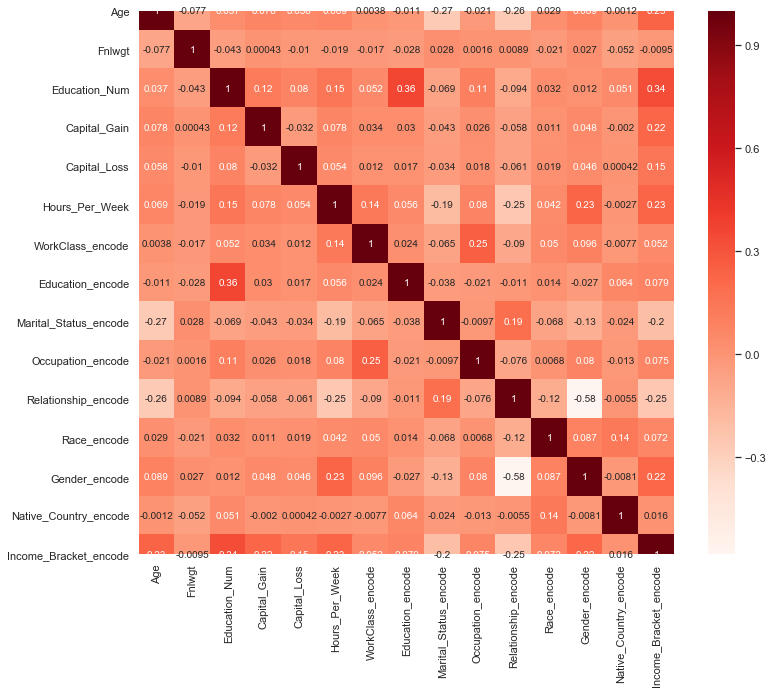

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
#Correlation with output variable
cor_target = abs(cor["Income_Bracket_encode"])
print(cor_target)

Age                      0.234037
Fnlwgt                   0.009463
Education_Num            0.335154
Capital_Gain             0.223329
Capital_Loss             0.150526
Hours_Per_Week           0.229689
WorkClass_encode         0.051604
Education_encode         0.079317
Marital_Status_encode    0.199307
Occupation_encode        0.075468
Relationship_encode      0.250918
Race_encode              0.071846
Gender_encode            0.215980
Native_Country_encode    0.015840
Income_Bracket_encode    1.000000
Name: Income_Bracket_encode, dtype: float64


In [ ]:
#Selecting highly correlated features
relevant_features = cor_target[cor_target>=0.2]
print(relevant_features)

Age                      0.234037
Education_Num            0.335154
Capital_Gain             0.223329
Hours_Per_Week           0.229689
Relationship_encode      0.250918
Gender_encode            0.215980
Income_Bracket_encode    1.000000
Name: Income_Bracket_encode, dtype: float64


# The features only with corr value>0.2 is used for model training and evaluation

In [ ]:
#Splitting the data into train and test
X=data_df[['Age','Education_Num','Capital_Gain','Hours_Per_Week','Relationship_encode','Gender_encode']]
y=data_df['Income_Bracket_encode']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=100)
print('Size of training dataset: ', X_train.shape)
print('Size of test dataset: ', X_test.shape)

Size of training dataset:  (22792, 6)
Size of test dataset:  (9769, 6)


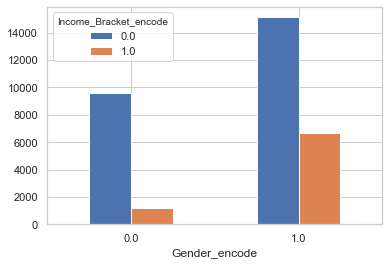

In [ ]:
# Visualizing Gender and Income_Bracket
ct=pd.crosstab(data_df['Gender_encode'],data_df['Income_Bracket_encode'])
barplot = ct.plot.bar(rot=0)


 


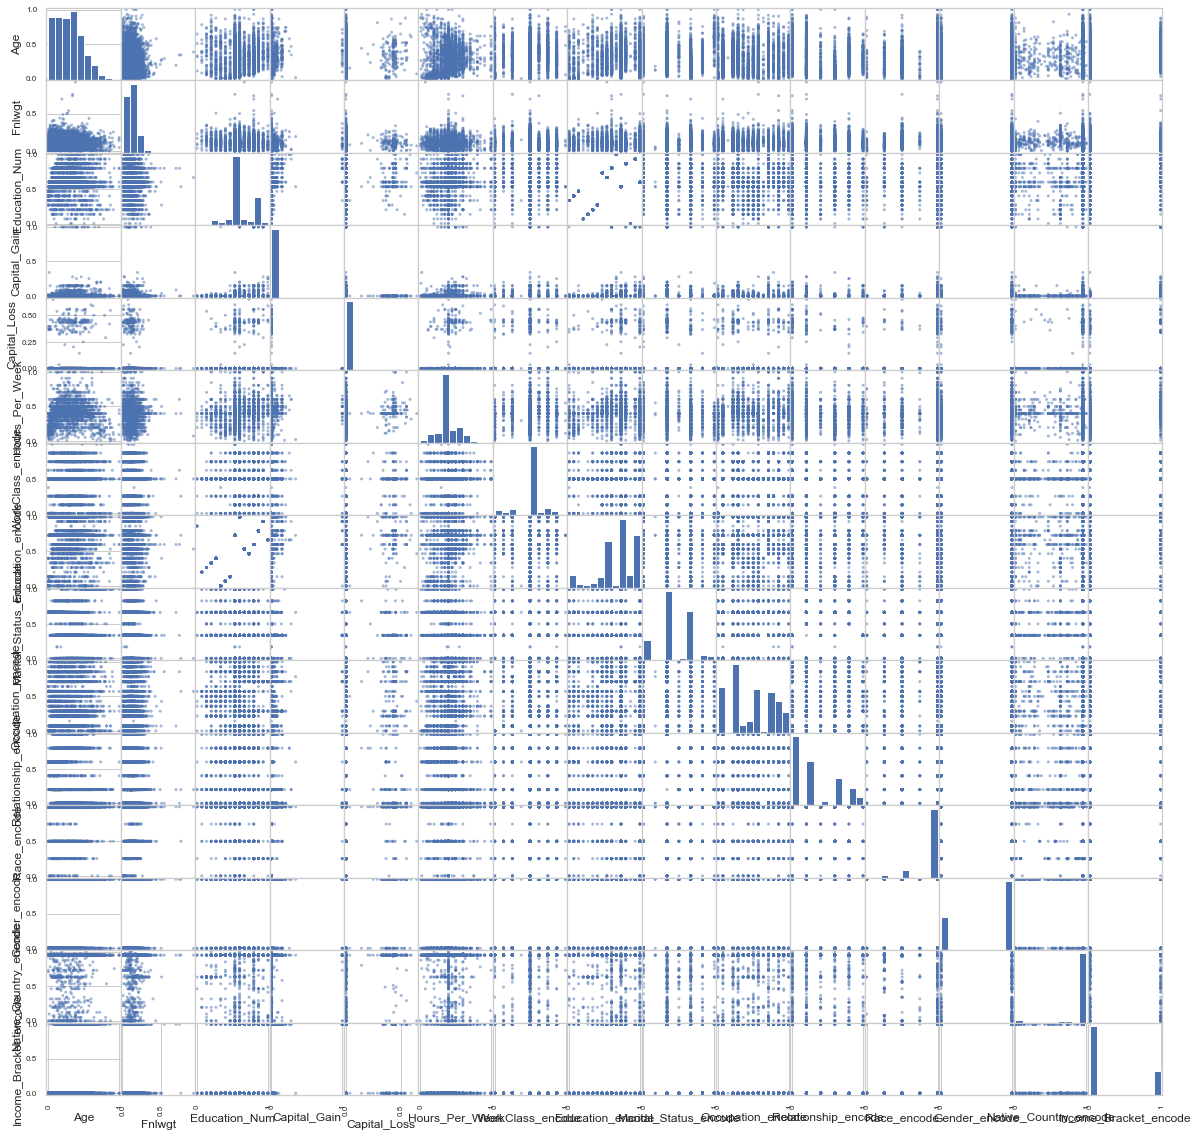

In [ ]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
new_data_df = data_df.select_dtypes(include=numerics)
numeric_cols=new_data_df.columns

from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

pd.plotting.scatter_matrix(new_data_df[numeric_cols].sample(4000),figsize=(20,20),cmap='viridis')
plt.show()


## Demo 3: Logistic Regression 

### 1. Fitting the model and evaluate on test data

In [ ]:
#training the data using logistic regression

logreg = LogisticRegression()
result=logreg.fit(X_train, y_train)

# Using the trained model to predict the outcome of the X_Test dataset
Y_pred = logreg.predict(X_test)

#Calculating the accuracy of the training dataset
train_acc_log = round(logreg.score(X_train, y_train) * 100, 2)
print('Training accuracy is',train_acc_log)

Training accuracy is 82.04


In [ ]:
# evalate the model on the test data
print('Test accuracy is',logreg.score(X_test, y_test))

Test accuracy is 0.8234210256935203


In [ ]:
#understanding model statistics
import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.480652
         Iterations 8
                            Results: Logit
Model:              Logit                 Pseudo R-squared: 0.130     
Dependent Variable: Income_Bracket_encode AIC:              21922.0205
Date:               2022-06-15 09:04      BIC:              21970.2255
No. Observations:   22792                 Log-Likelihood:   -10955.   
Df Model:           5                     LL-Null:          -12595.   
Df Residuals:       22786                 LLR p-value:      0.0000    
Converged:          1.0000                Scale:            1.0000    
No. Iterations:     8.0000                                            
----------------------------------------------------------------------
                       Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------------
Age                    0.0039   0.0851   0.0456 0.9636 -0.1630  0.1707
Edu

In [ ]:
# shows the slope of each feature
coeff_df = pd.DataFrame(X_train.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Coeff"] = pd.Series(logreg.coef_[0])
coeff_df.sort_values(by='Coeff', ascending=False)

,Feature,Coeff
2,Hours_Per_Week,15.966320
1,Capital_Gain,4.832012
3,Relationship_encode,3.107602
0,Education_Num,2.759769
4,Gender_encode,-0.767731


## Demo 4: Model Evaluation

### 1. Confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
cnf_matrix=metrics.confusion_matrix(y_test, Y_pred)
cnf_matrix
#print(confusion_matrix(y_test,Y_pred))
#tn, fp, fn, tp = confusion_matrix(y_test,Y_pred).ravel()
#print(tn, fp, fn, tp)

array([[7047,  381],
       [1344,  997]])

Visualizing COnfusion matrix

Text(0.5, 257.44, 'Predicted label')

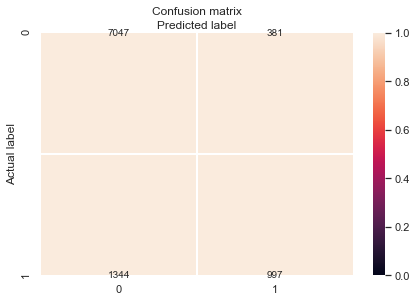

In [ ]:
import seaborn as sns
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
#plt.figure(figsize=(6,4))
ax=sns.heatmap(cnf_matrix, annot=True,fmt='d',linewidths=.5,vmin=0, vmax=1)
#sns.heatmap(cnf_matrix/np.sum(cnf_matrix), annot=True, fmt='.2%', cmap='Blues')
#make_confusion_matrix(cnf_matrix_2x2, figsize=(8,6), cbar=False)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


#Performance measures

In [ ]:
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
print('accuracy:', accuracy_score(y_test, Y_pred))
print('recall:', recall_score(y_test, Y_pred))
print('f1-score:', f1_score(y_test, Y_pred))
print('precision:', precision_score(y_test, Y_pred))

accuracy: 0.8234210256935203
recall: 0.42588637334472446
f1-score: 0.5361656359236353
precision: 0.7235123367198839


### 2. ROC-AUC

In [ ]:
from sklearn.metrics import roc_auc_score
roc=roc_auc_score(y_test, logreg.predict_proba(X_test)[:,1])
roc

0.8443910465428961

In [ ]:
# calculate roc curve

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, Y_pred)
# calculate AUC
auc = roc_auc_score(y_test, Y_pred)
print('AUC: %.3f' % auc)
# calculate AUC


AUC: 0.687


AUC score for the case is 0.596. 
AUC score 1 represents perfect classifier
AUC score >0.5 represents a decent classifier

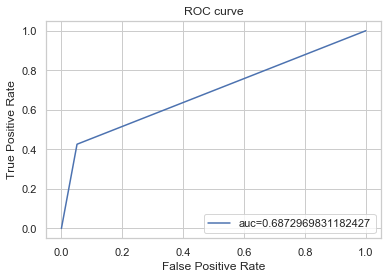

In [ ]:
#plotting ROC curve

plt.plot(fpr,tpr,label="auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend(loc=4)
plt.title('ROC curve')
plt.show()

The ROC curve is an evaluation metric for binary classification problems. It is a probability curve that plots the TPR against FPR at various threshold values .
The AUC is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the ROC curve.

The higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes.

In this case, AUC is 0.68. So, when the classifier predicts a value as True, then 68% percent of the times it turns out to be correct